<a href="https://colab.research.google.com/github/Nehaasati/DSA_1/blob/master/nvidia_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pdr.get_data_tiingo('NVDA',api_key='1d1852f7fa02418ebafded4292f4079883c8405d')


In [5]:
df.to_csv('NVDA.csv')

In [6]:
df=pd.read_csv('NVDA.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NVDA,2015-06-22 00:00:00+00:00,21.775,22.03,21.45,21.91,12855929,21.151471,21.399169,20.835777,21.282605,12855929,0.0,1.0
1,NVDA,2015-06-23 00:00:00+00:00,21.220,21.99,21.05,21.82,10351627,20.612363,21.360314,20.447231,21.195182,10351627,0.0,1.0
2,NVDA,2015-06-24 00:00:00+00:00,21.010,21.30,20.91,21.19,6334204,20.408376,20.690072,20.311240,20.583222,6334204,0.0,1.0
3,NVDA,2015-06-25 00:00:00+00:00,21.170,21.30,21.01,21.01,8761548,20.563795,20.690072,20.408376,20.408376,8761548,0.0,1.0
4,NVDA,2015-06-26 00:00:00+00:00,20.740,21.17,20.65,21.00,10532373,20.146108,20.563795,20.058685,20.398663,10532373,0.0,1.0


In [8]:
df2 = df.reset_index()['close']

In [ ]:
df2[1228:]

In [10]:
df2.shape

(1258,)

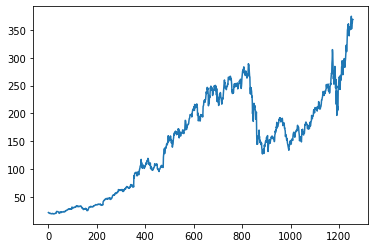

In [11]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=[0,1])
df1=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [13]:
df1

array([[0.00693663],
       [0.00537483],
       [0.00478388],
       ...,
       [0.96642841],
       [0.98528253],
       [0.98325642]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print(train_data.shape)

(817, 1)


In [15]:
def create_dataset(dataset,time_stamp=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_stamp-1):
        a=dataset[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(dataset[i+time_stamp,0])
    return np.array(dataX),np.array(dataY)
    

In [16]:
time_stamp=100
x_train,y_train=create_dataset(train_data,time_stamp)
x_test,y_test=create_dataset(test_data,time_stamp)

In [17]:
print(x_train.shape),print(x_test.shape)

(716, 100)
(340, 100)


(None, None)

In [18]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [22]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0470 - val_loss: 0.0217
Epoch 2/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0082 - val_loss: 0.0067
Epoch 3/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 2s 177ms/step - loss: 7.5786e-04 - val_loss: 0.0034
Epoch 6/100
12/12 [==============================] - 2s 180ms/step - loss: 6.5985e-04 - val_loss: 0.0034
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 6.4863e-04 - val_loss: 0.0037
Epoch 8/100
12/12 [==============================] - 2s 179ms/step - loss: 6.8498e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 2s 181ms/step - loss: 6.8617e-04 - val_loss: 0.0033
Epoch 10/100
12/12 [==============================] - 2s 181ms/step - l

In [24]:
train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

In [25]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

162.04845794807662

In [27]:
math.sqrt(mean_squared_error(y_test,test_predict))

225.02050807809803

<function matplotlib.pyplot.show>

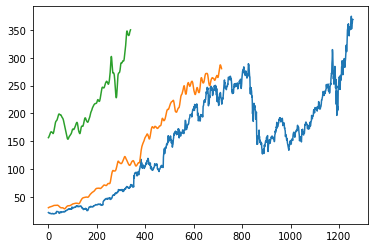

In [28]:
look_back=100
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#polt
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict)
plt.plot(test_predict)
plt.show

In [29]:
len(test_data)

441

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
from numpy import array
output=[]
n_step=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{}day input{}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape(1,n_step,1)
    yhat = model.predict(x_input,verbose=0)
    print("{}day input{}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    output.extend(yhat.tolist())
    i=i+1
  else:
      x_input=x_input.reshape(1,n_step,1)
      yhat = model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len[temp_input])
      output.extend(yhat.tolist())
      i=i+1

0day input[0.64346015 0.63662202 0.63738181 0.61098604 0.62196083 0.64109635
 0.65131135 0.6611183  0.65364701 0.68567087 0.69951598 0.71260131
 0.70764858 0.76114363 0.78022287 0.83124156 0.81435727 0.77318775
 0.7146837  0.68308195 0.69884061 0.65648919 0.70565061 0.72354795
 0.69388789 0.74628546 0.71471184 0.69431    0.63634061 0.68035232
 0.63923908 0.5543674  0.62339599 0.49833971 0.55706889 0.5164059
 0.54496848 0.52465106 0.54418055 0.64686515 0.63684714 0.66954638
 0.65685502 0.69304367 0.68744372 0.62967132 0.66456551 0.63203512
 0.70095115 0.67458352 0.69687078 0.68561459 0.70503152 0.74470959
 0.7359579  0.7749606  0.76826317 0.75343314 0.70407474 0.7509005
 0.74487843 0.76058082 0.78165804 0.76556168 0.78554142 0.76815061
 0.74141715 0.76535063 0.77225912 0.78365601 0.80357947 0.82505065
 0.85352882 0.82392503 0.82139239 0.84958915 0.90139577 0.93060558
 0.93682463 0.95534106 0.93341963 0.96167267 0.92694732 0.90527915
 0.90097366 0.94470396 0.93690905 0.93904773 0.9327724

In [33]:
day_new=np.arange(1,101)
day_predict=np.arange(101,131)

In [34]:
import matplotlib.pyplot as plt

In [36]:
len(df1)

1258

In [37]:
df3=df1.tolist()
df3.extend(output)

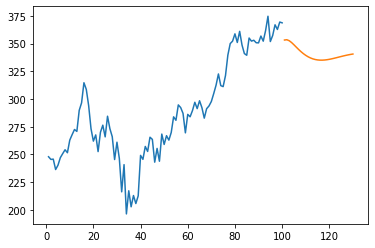

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_predict,scaler.inverse_transform(output))

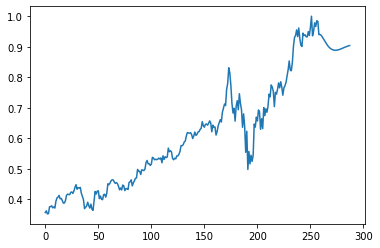

In [40]:
plt.plot(df3[1000:])